# Test Model on Progression Data from Paper

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras import Sequential, Model
from keras.layers import (Conv2D, MaxPooling2D, Dense, Flatten, \
                          Dropout, Input,GlobalAveragePooling2D,BatchNormalization)
from tensorflow.keras.activations import softmax
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.models import Model
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix, 
                             accuracy_score)
import cv2

# Base Libraries
from tensorflow.keras.applications import  VGG19,EfficientNetB0,VGG16,InceptionV3,ResNet50,EfficientNetB3
from tensorflow.keras.models import Model
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
# Transformation
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

import joblib

In [2]:
train_path = "Progression_images/"
images = []
labels = []

for file_name in os.listdir(train_path):
    if file_name.endswith(".jpg") or file_name.endswith(".png") or file_name.endswith(".jpeg"):
        # Read and preprocess the image
        img = cv2.imread(os.path.join(train_path, file_name))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (180, 180))

        # Extract label from the file name or use some other logic to assign labels
        label = file_name

        # Append the image and label to the lists
        images.append(img)
        labels.append(label)

len(labels)

75

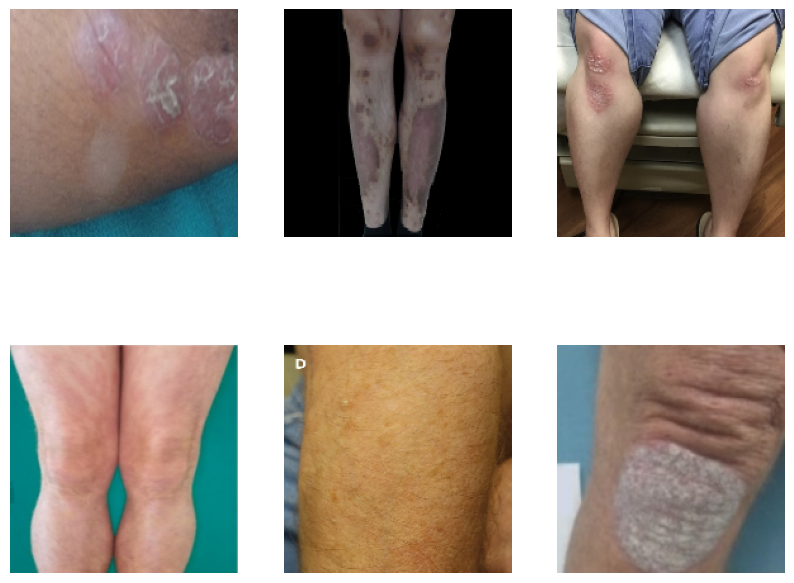

In [3]:
# Create a list of example inputs to our Gradio demo
example_list = [image for image in random.sample(images, k=6)]

# Plot the images in a 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(10, 8))

for ax, img_array in zip(axes.ravel(), example_list):
    ax.imshow(img_array)
    ax.axis('off')

plt.show()

In [4]:
# Convert lists to numpy arrays for further processing
images = np.array(images)
labels = np.array(labels)
print(images.shape)
print(labels.shape)

(75, 180, 180, 3)
(75,)


# Extract features using VGG-19 pretrained on ImageNet

In [5]:
vgg_model = VGG19(weights = 'imagenet',  include_top = False, input_shape = (180, 180, 3)) 
# let's make all layers non-trainable
for layer in vgg_model.layers : 
    layer.trainable = False

In [6]:
for i in range(3): 
    
    # let's make all layers non-trainable
    for layer in vgg_model.layers :
        layer.trainable = False
    features=vgg_model.predict(images)
    print(features.shape)
    features=features.reshape(len(images),-1)
    print(features.shape)

3/3 [==============================] - 3s 840ms/step
(75, 5, 5, 512)
(75, 12800)
3/3 [==============================] - 3s 864ms/step
(75, 5, 5, 512)
(75, 12800)
3/3 [==============================] - 3s 833ms/step
(75, 5, 5, 512)
(75, 12800)


In [8]:
vgg19_progression_array = np.array(features)
vgg19_progression_df = pd.concat([pd.Series(labels), pd.DataFrame(features)],axis = 1)
# Rename only the first column to 'id'
vgg19_progression_df.columns = ['id'] + list(vgg19_progression_df.columns[1:])
vgg19_progression_df.to_csv('vgg19_progression_df.csv')
vgg19_progression_df

,id,0,1,2,3,4,5,6,7,8,...,12790,12791,12792,12793,12794,12795,12796,12797,12798,12799
0,p21_d.jpeg,0.000000,0.000000,0.000000,0.000000,0.0,24.129498,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,61.213688,0.0,0.000000,1.137391,0.000000,0.000000,0.0
1,p14_a.jpeg,0.000000,0.000000,3.217135,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,23.716703,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
2,p18_a.jpeg,0.000000,0.000000,0.000000,0.000000,0.0,6.033783,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
3,p11_b.jpeg,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,5.029374,0.0
4,p7_a.jpeg,0.000000,0.000000,0.000000,15.215242,0.0,0.000000,8.745038,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,3.185055,0.000000,12.647277,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,p16_c.jpeg,0.000000,22.033216,0.000000,1.241478,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
71,p14_b.jpeg,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,16.635218,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
72,p11_a.jpeg,5.462509,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,12.414635,0.0,0.000000,0.000000,0.000000,0.000000,0.0
73,p18_b.jpeg,0.000000,34.874462,0.000000,0.000000,0.0,10.321596,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0


# Generate tables of pairs of images

In [25]:
from itertools import combinations

# Extract image numbers (e.g., 'p1' from 'p1_a.jpeg')
image_numbers = list(set([label.split('_')[0][1:] for label in labels]))

# Find all possible pairs with the same number behind 'p'
image_pairs = []
for number in image_numbers:
    pairs = combinations([label for label in labels if f'p{number}_' in label], 2)
    image_pairs.extend(pairs)

# Create a DataFrame
pairs_df = pd.DataFrame(image_pairs, columns=['ImageA', 'ImageB'])

# Add a third column based on the last letter
pairs_df['Progression'] = pairs_df.apply(lambda row: 'Improved' if row['ImageA'][-6] < row['ImageB'][-6] else 'Worsened', axis=1)

# Display the DataFrame
display(pairs_df.head())
print(pairs_df.shape)
print(pairs_df['Progression'].value_counts())

,ImageA,ImageB,Progression
0,p21_d.jpeg,p21_b.jpeg,Worsened
1,p21_d.jpeg,p21_c.jpeg,Worsened
2,p21_d.jpeg,p21_a.jpeg,Worsened
3,p21_b.jpeg,p21_c.jpeg,Improved
4,p21_b.jpeg,p21_a.jpeg,Worsened


(72, 3)
Progression
Worsened    51
Improved    21
Name: count, dtype: int64


In [45]:
pairs_df.head(55)

,ImageA,ImageB,Progression
0,p21_d.jpeg,p21_b.jpeg,Worsened
1,p21_d.jpeg,p21_c.jpeg,Worsened
2,p21_d.jpeg,p21_a.jpeg,Worsened
3,p21_b.jpeg,p21_c.jpeg,Improved
4,p21_b.jpeg,p21_a.jpeg,Worsened
5,p21_c.jpeg,p21_a.jpeg,Worsened
6,p40_b.png,p40_c.png,Worsened
7,p40_b.png,p40_a.png,Worsened
8,p40_c.png,p40_a.png,Worsened
9,p20_a.jpeg,p20_d.jpeg,Improved


In [26]:
# Merge dataframes based on the first columns -> extract features for ImageA & B
result_df = pd.merge(pairs_df, vgg19_progression_df, left_on='ImageA', right_on='id', how='left')
ImageA_feature = result_df.iloc[:,4:]

result_df = pd.merge(pairs_df, vgg19_progression_df, left_on='ImageB', right_on='id', how='left')
ImageB_feature = result_df.iloc[:,4:]
print(ImageB_feature.shape)
Feature_difference = ImageB_feature - ImageA_feature
print(Feature_difference.shape)

(72, 12800)
(72, 12800)


In [27]:
X_paper = Feature_difference
y_paper = pairs_df['Progression']
joblib.dump([X_paper, y_paper], 'Paper_X_y.pkl')

['Paper_X_y.pkl']

### Creat Train & Test set for Progression paper images

In [46]:
# Get pure train-test split where patients, rather than image pairs, were split into train & test
X_dermnet, y_dermnet = joblib.load('dermnet_X_y.pkl')
X_paper, y_paper = joblib.load('Paper_X_y.pkl')

train_index = range(0, 54)
X_train_paper = Feature_difference.iloc[train_index]
X_test_paper = Feature_difference[~Feature_difference.index.isin(train_index)]
y_train_paper = pairs_df.iloc[train_index]['Progression']
y_test_paper = pairs_df[~pairs_df.index.isin(train_index)]['Progression']

paper_df_test = pairs_df.loc[y_test_paper.index]

joblib.dump([X_train_paper, X_test_paper, y_train_paper,y_test_paper,X_paper,y_paper], 'Paper_X_y_train_test.pkl')

['Paper_X_y_train_test.pkl']

# Train on Dermnet-train, test on Paper

In [47]:
from sklearn.metrics import roc_curve, confusion_matrix, roc_auc_score, f1_score, accuracy_score, balanced_accuracy_score, classification_report

def conf_matrix_heatmap(cm):
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, cmap='Greens'); #annot=True to annotate cells
    ax.set_xlabel('Predicted status')
    ax.set_ylabel('True status')
    ax.set_title('Confusion Matrix')

def modelPerformance(confMat):
    TN = confMat[0, 0]
    TP = confMat[1, 1]
    FP = confMat[0, 1]
    FN = confMat[1, 0]
    prec = TP / (TP + FP)
    rec = TP / (TP + FN)
    spec = TN / (TN + FP)
    fpr = FP / (TN + FP)
    f1 = 2 * (prec * rec) / (prec + rec)
    acc = (TP + TN) / (TP + FP + TN + FN)
    return (acc, prec, rec, spec, fpr, f1)

def printPerformance(confMat):
    acc, prec, rec, spec, fpr, f1 = modelPerformance(confMat)
    print("Accuracy = " "%.4f" % acc)
    print("Precision = " "%.4f" % prec)
    print("Recall = " "%.4f" % rec)
    print("Specificity = " "%.4f" % spec)
    print("False positive rate = " "%.4f" % fpr)
    print("F1-score = " "%.4f" % f1)
    np.set_printoptions(precision=2)
    print("Confusion matrix (%):")
    print(confMat/np.sum(confMat)*100)

def predict_from_pkl(pkl,x,y):
    model = joblib.load(pkl)
    y_pred = model.predict(Feature_difference)
    print(classification_report(y, y_pred))
    print('accuracy:', accuracy_score(y, y_pred))

    cm_default = confusion_matrix(y, y_pred)
    conf_matrix_heatmap(cm_default)
    return y_pred

def run_random_forest(X_train, y_train, X_test, y_test, quality_scores, CID = 5):
    RF =  RandomForestClassifier(
        n_estimators=1000, 
        criterion='entropy', 
        oob_score=True, 
        class_weight='balanced',
        random_state=CID)
    
    RF.fit(X_train, y_train, sample_weight=quality_scores)
    y_RF = RF.predict(X_test) 

    # classification report 
    print(classification_report(y_test, y_RF)) 
    print('accuracy:', accuracy_score(y_test, y_RF))
    cm_default = confusion_matrix(y_test, y_RF)
    display(conf_matrix_heatmap(cm_default))

In [33]:
y_pred = predict_from_pkl('rf_1000trees.pkl', Feature_difference, pairs_df['Progression'])

/Users/kexinxu/anaconda3/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/kexinxu/anaconda3/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


AttributeError: 'DecisionTreeClassifier' object has no attribute 'monotonic_cst'

# Train on pairs-by-name DermNet and test on paper data

In [48]:
y_pred = predict_from_pkl('rf_trained_on_pair_by_name.pkl', Feature_difference, pairs_df['Progression'])

/Users/kexinxu/anaconda3/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/kexinxu/anaconda3/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.0 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


AttributeError: 'DecisionTreeClassifier' object has no attribute 'monotonic_cst'

# Train on paper data and test on paper data

In [34]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline

              precision    recall  f1-score   support

    Improved       0.00      0.00      0.00         6
    Worsened       0.67      1.00      0.80        12

    accuracy                           0.67        18
   macro avg       0.33      0.50      0.40        18
weighted avg       0.44      0.67      0.53        18

accuracy: 0.6666666666666666


/Users/kexinxu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kexinxu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kexinxu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


None

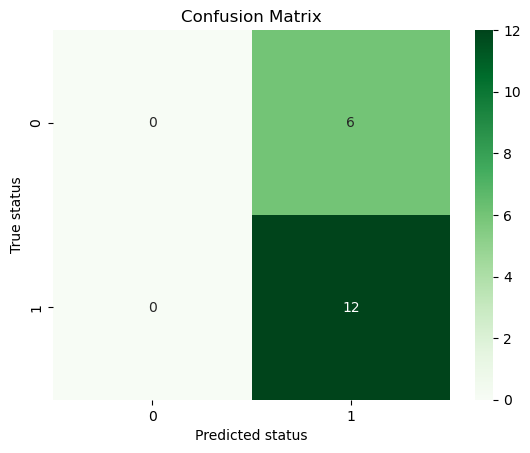

In [49]:
quality_scores = np.repeat(1, X_train_paper.shape[0]) 
run_random_forest(X_train_paper, y_train_paper,X_test_paper,y_test_paper,quality_scores)

# train on entire Dermnet + test on paper-test

In [36]:
X_dermnet, y_dermnet = joblib.load('dermnet_X_y.pkl')
CID = 5

              precision    recall  f1-score   support

    Improved       0.40      1.00      0.57         6
   No change       0.00      0.00      0.00         0
    Worsened       1.00      0.17      0.29        12

    accuracy                           0.44        18
   macro avg       0.47      0.39      0.29        18
weighted avg       0.80      0.44      0.38        18

accuracy: 0.4444444444444444


/Users/kexinxu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kexinxu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kexinxu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


None

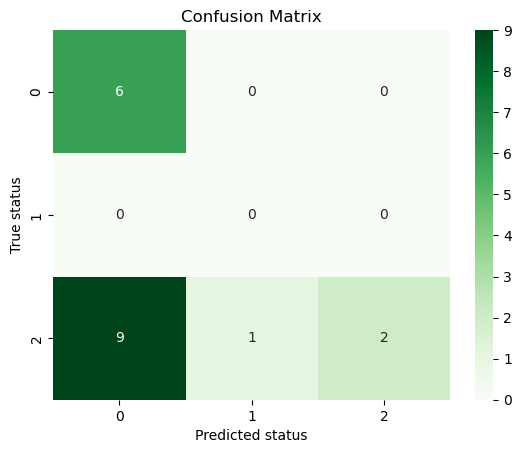

In [50]:
quality_scores = np.repeat(1, X_dermnet.shape[0]) 
run_random_forest(X_dermnet, y_dermnet,X_test_paper,y_test_paper,quality_scores)

In [51]:
RF =  RandomForestClassifier(
        n_estimators=1000, 
        criterion='entropy', 
        oob_score=True, 
        class_weight='balanced',
        random_state=CID)
RF.fit(X_dermnet, y_dermnet)
print(cross_val_score(RF,X_dermnet, y_dermnet, n_jobs=-1, cv=5)) 
y_RF = RF.predict(X_test_paper) 

[0.56470588 0.5        0.46428571 0.51190476 0.60714286]


# Train on dermnet + paper, test on paper

### Assign higher quality scores for Paper_train and lower to images in Dermnet

In [52]:
print(X_dermnet.shape)
print(X_train_paper.shape)
print(X_test_paper.shape)

(421, 12800)
(54, 12800)
(18, 12800)


In [53]:
X_dermnet_paper_train = pd.concat([X_train_paper, pd.DataFrame(X_dermnet, columns=X_train_paper.columns)], axis=0, ignore_index=True)
print(X_dermnet_paper_train.shape)
y_dermnet_paper_train = pd.concat([y_train_paper, y_dermnet], axis=0)
print(y_dermnet_paper_train.shape)

(475, 12800)
(475,)


              precision    recall  f1-score   support

    Improved       0.67      0.67      0.67         6
   No change       0.00      0.00      0.00         0
    Worsened       0.82      0.75      0.78        12

    accuracy                           0.72        18
   macro avg       0.49      0.47      0.48        18
weighted avg       0.77      0.72      0.74        18

accuracy: 0.7222222222222222


/Users/kexinxu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kexinxu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kexinxu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


None

              precision    recall  f1-score   support

    Improved       1.00      0.50      0.67         6
   No change       0.00      0.00      0.00         0
    Worsened       0.79      0.92      0.85        12

    accuracy                           0.78        18
   macro avg       0.60      0.47      0.50        18
weighted avg       0.86      0.78      0.79        18

accuracy: 0.7777777777777778


/Users/kexinxu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kexinxu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kexinxu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


None

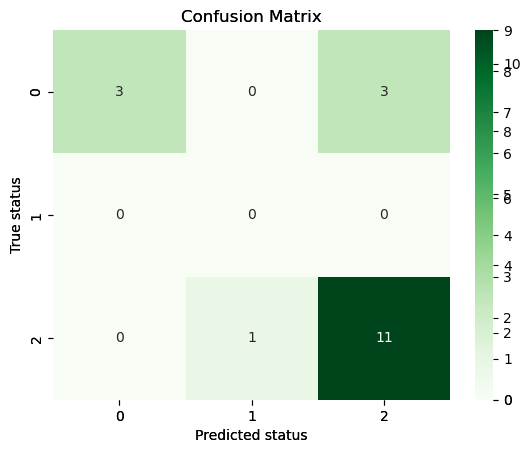

In [54]:
quality_scores = np.repeat(1, X_dermnet_paper_train.shape[0]) 
run_random_forest(X_dermnet_paper_train, y_dermnet_paper_train,X_test_paper,y_test_paper,quality_scores)

quality_scores = np.repeat([5,1], [X_train_paper.shape[0], X_dermnet.shape[0]] ) 
run_random_forest(X_dermnet_paper_train, y_dermnet_paper_train,X_test_paper,y_test_paper,quality_scores)

In [50]:
paper_df_test['Prediction'] = y_RF
paper_df_test.to_csv('paper_df_test.csv')
paper_df_test

,ImageA,ImageB,Progression,Prediction
32,p7_a.jpeg,p7_b.jpeg,Improved,Improved
33,p14_a.jpeg,p14_b.jpeg,Improved,Improved
34,p19_d.jpeg,p19_c.jpeg,Worsened,Improved
35,p19_d.jpeg,p19_b.jpeg,Worsened,Worsened
36,p19_d.jpeg,p19_a.jpeg,Worsened,Worsened
37,p19_c.jpeg,p19_b.jpeg,Worsened,Worsened
38,p19_c.jpeg,p19_a.jpeg,Worsened,Worsened
39,p19_b.jpeg,p19_a.jpeg,Worsened,Worsened
40,p20_a.jpeg,p20_d.jpeg,Improved,Improved
41,p20_a.jpeg,p20_b.jpeg,Improved,Worsened


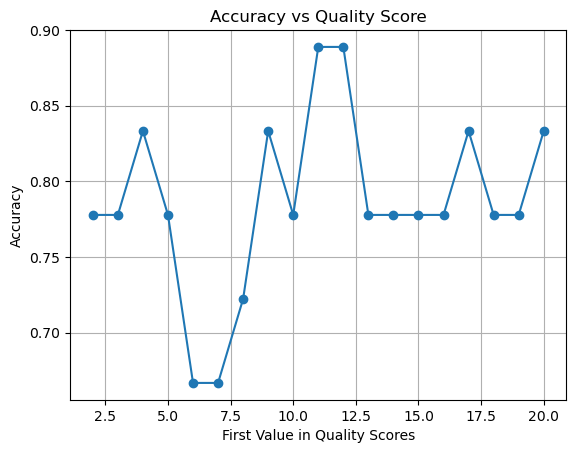

In [56]:
# CID = 2
# Set the initial quality score value
initial_quality_score = 2

# Create an array to store accuracy scores for each quality score
accuracy_scores = []

# Create an array of quality score values to test
quality_score_values = np.arange(2, 21)

for quality_score_value in quality_score_values:
    # Repeat the updated value for the required number of times
    quality_scores = np.repeat([quality_score_value, 1], [54, 421])

    # Create RandomForestClassifier
    RF = RandomForestClassifier(
        n_estimators=1000,
        criterion='entropy',
        oob_score=True,
        class_weight='balanced',
        random_state=CID
    )

    # Fit the model with the updated quality scores
    RF.fit(X_dermnet_paper_train, y_dermnet_paper_train, sample_weight=quality_scores)

    # Predict on the test set
    y_RF = RF.predict(X_test_paper)

    # Evaluate the model and store accuracy score
    accuracy = accuracy_score(y_test_paper, y_RF)
    accuracy_scores.append(accuracy)

# Plotting accuracy vs the first value in quality_scores
plt.plot(quality_score_values, accuracy_scores, marker='o')
plt.xlabel('First Value in Quality Scores')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Quality Score')
plt.grid(True)
plt.show()

5 as quality score for the Paper data seems to be good 

# Train on pairs by name DermNet data, test on publication

In [57]:
vgg19_progression_df = pd.read_csv('vgg19_progression_df.csv', index_col=0)
vgg19_progression_df.head()

,id,0,1,2,3,4,5,6,7,8,...,12790,12791,12792,12793,12794,12795,12796,12797,12798,12799
0,p21_d.jpeg,0.0,0.0,0.000000,0.000000,0.0,24.129498,0.000000,0.0,0.0,...,0.0,0.000000,0.0,61.213688,0.0,0.000000,1.137391,0.000000,0.000000,0.0
1,p14_a.jpeg,0.0,0.0,3.217135,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,23.716703,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
2,p18_a.jpeg,0.0,0.0,0.000000,0.000000,0.0,6.033783,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
3,p11_b.jpeg,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,5.029374,0.0
4,p7_a.jpeg,0.0,0.0,0.000000,15.215242,0.0,0.000000,8.745038,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,3.185055,0.000000,12.647277,0.000000,0.0


In [96]:
[X_paper, y_paper] = joblib.load('Paper_X_y.pkl')

In [105]:
import joblib
from sklearn.metrics import roc_curve, confusion_matrix, roc_auc_score, f1_score, accuracy_score, balanced_accuracy_score, classification_report

def conf_matrix_heatmap(cm):
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, cmap='Greens'); #annot=True to annotate cells
    ax.set_xlabel('Predicted status')
    ax.set_ylabel('True status')
    ax.set_title('Confusion Matrix')

def modelPerformance(confMat):
    TN = confMat[0, 0]
    TP = confMat[1, 1]
    FP = confMat[0, 1]
    FN = confMat[1, 0]
    prec = TP / (TP + FP)
    rec = TP / (TP + FN)
    spec = TN / (TN + FP)
    fpr = FP / (TN + FP)
    f1 = 2 * (prec * rec) / (prec + rec)
    acc = (TP + TN) / (TP + FP + TN + FN)
    return (acc, prec, rec, spec, fpr, f1)

def printPerformance(confMat):
    acc, prec, rec, spec, fpr, f1 = modelPerformance(confMat)
    print("Accuracy = " "%.4f" % acc)
    print("Precision = " "%.4f" % prec)
    print("Recall = " "%.4f" % rec)
    print("Specificity = " "%.4f" % spec)
    print("False positive rate = " "%.4f" % fpr)
    print("F1-score = " "%.4f" % f1)
    np.set_printoptions(precision=2)
    print("Confusion matrix (%):")
    print(confMat/np.sum(confMat)*100)

def predict_from_pkl(pkl,x,y):
    model = joblib.load(pkl)
    y_pred = model.predict(Feature_difference)
    print(classification_report(y, y_pred))
    print('accuracy:', accuracy_score(y, y_pred))

    cm_default = confusion_matrix(y, y_pred)
    conf_matrix_heatmap(cm_default)
    return y_pred

def run_random_forest(X_train, y_train, X_test, y_test, quality_scores, CID = 5):
    RF =  RandomForestClassifier(
        n_estimators=1000, 
        criterion='entropy', 
        oob_score=True, 
        class_weight='balanced',
        random_state=CID)
    
    RF.fit(X_train, y_train, sample_weight=quality_scores)
    y_RF = RF.predict(X_test) 

    # classification report 
    print(classification_report(y_test, y_RF)) 
    print('accuracy:', accuracy_score(y_test, y_RF))
    cm_default = confusion_matrix(y_test, y_RF)
    display(conf_matrix_heatmap(cm_default))

              precision    recall  f1-score   support

    Improved       0.50      0.52      0.51        21
   No change       0.00      0.00      0.00         0
    Worsened       0.63      0.52      0.57        33

    accuracy                           0.52        54
   macro avg       0.38      0.35      0.36        54
weighted avg       0.58      0.52      0.55        54

accuracy: 0.5185185185185185


/Users/kexinxu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kexinxu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kexinxu/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Progression
Worsened    33
Improved    21
Name: count, dtype: int64

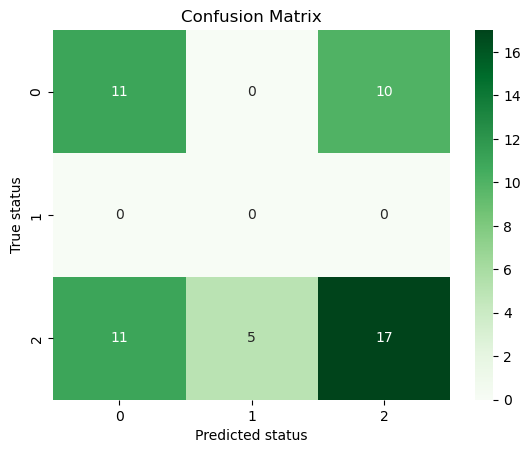

In [33]:
Lasso_pairs_by_names = joblib.load('Lasso_pairs_by_names.pkl')
scaler = joblib.load('standard_scaler_fit_on_Dermnet_train.pkl')
X_paper_scaled = scaler.transform(np.array(X_paper))
y_pred = Lasso_pairs_by_names.predict(X_paper_scaled)

# Convert Lasso result to 3 classes
# Function to categorize values
def categorize_value(value):
    if value > 0.5:
        return 'Worsened'
    elif value < -0.5:
        return 'Improved'
    else:
        return 'No change'

# Apply the function to create a new categorical column
y_pred_lasso_cat = np.vectorize(categorize_value)(y_pred)

print(classification_report(y_paper, y_pred_lasso_cat))
print('accuracy:', accuracy_score(y_paper, y_pred_lasso_cat))

cm_default = confusion_matrix(y_paper, y_pred_lasso_cat)
conf_matrix_heatmap(cm_default)
display(y_paper.value_counts()) # to see the class breakdown in the test-set 


# Extract features from publication images with PASI score

In [54]:
labels = []
train_path = "Publication_images_with_PASI/"
images = []
labels = []

for file_name in os.listdir(train_path):
    if file_name.endswith(".jpg") or file_name.endswith(".png") or file_name.endswith(".jpeg"):
        # Read and preprocess the image
        img = cv2.imread(os.path.join(train_path, file_name))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (180, 180))

        # Extract label from the file name or use some other logic to assign labels
        label = file_name

        # Append the image and label to the lists
        images.append(img)
        labels.append(label)

len(labels)

# Convert lists to numpy arrays for further processing
images = np.array(images)
labels = np.array(labels)
print(images.shape)
print(labels.shape)

(14, 180, 180, 3)
(14,)


# train on dermnet + publication with PASI, test on progrssion images

In [74]:
import re

# Function to extract numbers from a string
def extract_number(item):
    match = re.search(r'\d+', item)
    return match.group() if match else ''

In [71]:
vgg_model = VGG19(weights = 'imagenet',  include_top = False, input_shape = (180, 180, 3)) 
# let's make all layers non-trainable
for layer in vgg_model.layers : 
    layer.trainable = False

for i in range(3): 
    
    # let's make all layers non-trainable
    for layer in vgg_model.layers :
        layer.trainable = False
    features=vgg_model.predict(images)
    print(features.shape)
    features=features.reshape(len(images),-1)
    print(features.shape)

vgg19_PASI_publication_array = np.array(features)
vgg19_PASI_publication_df = pd.concat([pd.Series(labels), pd.DataFrame(features)],axis = 1)
# Rename only the first column to 'id'
vgg19_PASI_publication_df.columns = ['id'] + list(vgg19_PASI_publication_df.columns[1:])
vgg19_PASI_publication_df.to_csv('vgg19_PASI_publication_df.csv')
vgg19_PASI_publication_df['id'] = vgg19_PASI_publication_df['id'].apply(extract_number).apply(int)
vgg19_PASI_publication_df.head()

1/1 [==============================] - 1s 641ms/step
(14, 5, 5, 512)
(14, 12800)
1/1 [==============================] - 1s 562ms/step
(14, 5, 5, 512)
(14, 12800)
1/1 [==============================] - 1s 561ms/step
(14, 5, 5, 512)
(14, 12800)


,id,0,1,2,3,4,5,6,7,8,...,12790,12791,12792,12793,12794,12795,12796,12797,12798,12799
0,28,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,6.470096,0.000000,14.679021,0.0,0.0,0.0,0.000000,0.0
1,29,0.0,0.0,0.000000,0.0,3.293665,0.0,0.0,0.0,0.0,...,1.238764,0.0,0.000000,12.964173,16.514797,0.0,0.0,0.0,6.041672,0.0
2,33,0.0,0.0,0.000000,0.0,14.114625,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,3.410943,0.0
3,27,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
4,26,0.0,0.0,3.110706,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,3.148150,5.694448,0.0,0.0,0.0,0.000000,0.0


In [89]:
from sklearn.neighbors import NearestNeighbors

# Assuming your data is stored in a variable named 'data'
nbrs = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(vgg19_PASI_publication_array) # it automatically selects 'brute' for auto
distances, indices = nbrs.kneighbors(vgg19_PASI_publication_array)

# Convert each row to a tuple, sort the tuple, and then create a set
unique_tuples = set(tuple(sorted(row)) for row in indices)

# Convert the set back to a NumPy array
unique_indices = np.array(list(unique_tuples))

# Get the indices that would sort the array along the first column
sorted_indices = np.argsort(unique_indices[:, 0])

# Use the sorted indices to reorder the array
sorted_pairs = unique_indices[sorted_indices]

# get index for imageA and B 
ImageA_index = [(a_set)[0] for a_set in sorted_pairs]
ImageB_index = [(a_set)[1] for a_set in sorted_pairs]

sorted_pairs_df = pd.DataFrame(sorted_pairs, columns=['ImageA','ImageB']).applymap(lambda x: vgg19_PASI_publication_df['id'][x])

sorted_pairs_df

,ImageA,ImageB
0,28,29
1,28,34
2,33,25
3,27,37
4,27,25
5,26,25
6,32,24
7,24,25
8,30,34
9,31,34


In [76]:
PASI_publication_severity = pd.read_excel('Publication_images_with_PASI.xlsx', names=['Image','PASI'], header=None)
PASI_publication_severity['Image'] = PASI_publication_severity['Image'].str.replace('p', '')
PASI_publication_severity = PASI_publication_severity.applymap(int)
PASI_publication_severity

,Image,PASI
0,24,0
1,25,3
2,26,6
3,27,7
4,28,8
5,29,9
6,30,11
7,31,12
8,32,2
9,33,3


In [94]:
# Merge dataframes on the common index
merged_df = pd.merge(sorted_pairs_df, PASI_publication_severity, left_on='ImageA', right_on="Image", how='left')

# Create the 'SeverityA' column
merged_df['SeverityA'] = merged_df['PASI']
merged_df = merged_df.drop(['Image', 'PASI'], axis=1).applymap(int)

# Merge dataframes on the common index
merged_df = pd.merge(merged_df, PASI_publication_severity, left_on='ImageB', right_on="Image", how='left')

# Create the 'SeverityA' column
merged_df['SeverityB'] = merged_df['PASI']
merged_df = merged_df.drop(['Image', 'PASI'], axis=1)

# Function to categorize values
def categorize_value(value):
    if value > 0:
        return 'Worsened'
    elif value < 0:
        return 'Improved'
    else:
        return 'No change'

# Apply the function to create a new categorical column
merged_df['Progression'] = (merged_df['SeverityB'] - merged_df['SeverityA']).apply(categorize_value)
display(merged_df)

# Get feature difference 
ImageA_feature = np.array(vgg19_PASI_publication_df.iloc[ImageA_index, 1:])
ImageB_feature = np.array(vgg19_PASI_publication_df.iloc[ImageB_index, 1:])
feature_difference = ImageB_feature - ImageA_feature
print('shape of feature difference is', feature_difference.shape)

,ImageA,ImageB,SeverityA,SeverityB,Progression
0,28,29,8,9,Worsened
1,28,34,8,7,Improved
2,33,25,3,3,No change
3,27,37,7,8,Worsened
4,27,25,7,3,Improved
5,26,25,6,3,Improved
6,32,24,2,0,Improved
7,24,25,0,3,Worsened
8,30,34,11,7,Improved
9,31,34,12,7,Improved


shape of feature difference is (13, 12800)


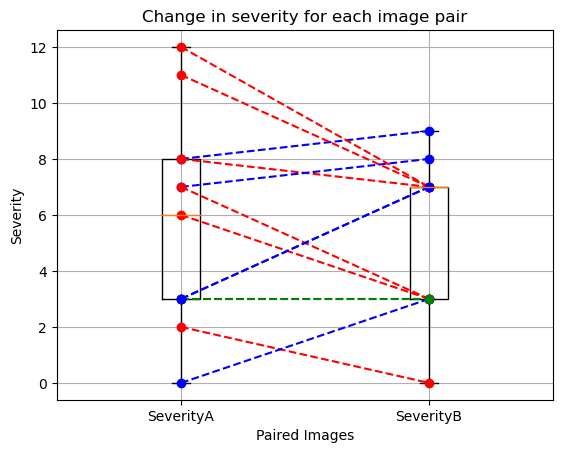

In [63]:
# Create paired box plots
bp = plt.boxplot([merged_df['SeverityA'], merged_df['SeverityB']], positions=[0, 1], labels=['SeverityA', 'SeverityB'])

# Draw lines connecting paired dots with different colors based on the relationship
for i, row in merged_df.iterrows():
    color = 'green'  # default color for equal values
    if row['SeverityB'] > row['SeverityA']:
        color = 'blue'  # blue for SeverityB > SeverityA
    elif row['SeverityB'] < row['SeverityA']:
        color = 'red'  # red for SeverityB < SeverityA
    plt.plot([0, 1], [row['SeverityA'], row['SeverityB']], color=color, linestyle='--', marker='o')

# Customize plot
plt.xlabel('Paired Images')
plt.ylabel('Severity')
plt.title('Change in severity for each image pair')
plt.grid(True)

# Show plot
plt.show()

In [ ]:
    # Get feature difference 
    ImageA_feature = np.array(vgg19_feature_severity_df.iloc[merged_df['ImageA'], 3:])
    ImageB_feature = np.array(vgg19_feature_severity_df.iloc[merged_df['ImageB'], 3:])
    feature_difference = ImageB_feature - ImageA_feature
    print('shape of feature difference is', feature_difference.shape)

In [100]:
X_PASI = feature_difference
y_PASI = merged_df['Progression']
joblib.dump([X_PASI, y_PASI], 'PASI_X_y.pkl')

['PASI_X_y.pkl']

In [102]:
merged_df.to_csv("Publication_images_with_PASI_KNN_paired.csv")

# train on dermnet + publication with PASI, test on test progrssion images 

In [58]:
X_dermnet, y_dermnet = joblib.load('dermnet_X_y.pkl')
X_PASI, y_PASI = joblib.load('PASI_X_y.pkl')
X_train_paper, X_test_paper, y_train_paper,y_test_paper,X_paper,y_paper = joblib.load('Paper_X_y_train_test.pkl')

print(X_dermnet.shape)
print(y_dermnet.shape)
print(X_PASI.shape)
print(y_PASI.shape)
print(X_paper.shape)
print(y_paper.shape)
print(X_train_paper.shape)
print(y_train_paper.shape)
print(X_test_paper.shape)
print(y_test_paper.shape)
#pairs_df.loc[y_test_paper.index]

X_dermnet_PASI_train = np.vstack((X_PASI, X_dermnet)) 
print(X_dermnet_PASI_train.shape)
y_dermnet_PASI_train = pd.concat([y_PASI, y_dermnet], axis=0)
print(y_dermnet_PASI_train.shape)

(421, 12800)
(421,)
(13, 12800)
(13,)
(72, 12800)
(72,)
(54, 12800)
(54,)
(18, 12800)
(18,)
(434, 12800)
(434,)


              precision    recall  f1-score   support

    Improved       0.38      0.83      0.53         6
    Worsened       0.80      0.33      0.47        12

    accuracy                           0.50        18
   macro avg       0.59      0.58      0.50        18
weighted avg       0.66      0.50      0.49        18

accuracy: 0.5


None

              precision    recall  f1-score   support

    Improved       0.43      1.00      0.60         6
    Worsened       1.00      0.33      0.50        12

    accuracy                           0.56        18
   macro avg       0.71      0.67      0.55        18
weighted avg       0.81      0.56      0.53        18

accuracy: 0.5555555555555556


None

              precision    recall  f1-score   support

    Improved       0.34      0.95      0.51        21
    Worsened       0.93      0.25      0.40        51

    accuracy                           0.46        72
   macro avg       0.64      0.60      0.45        72
weighted avg       0.76      0.46      0.43        72

accuracy: 0.4583333333333333


None

              precision    recall  f1-score   support

    Improved       0.37      1.00      0.54        21
    Worsened       1.00      0.29      0.45        51

    accuracy                           0.50        72
   macro avg       0.68      0.65      0.50        72
weighted avg       0.82      0.50      0.48        72

accuracy: 0.5


None

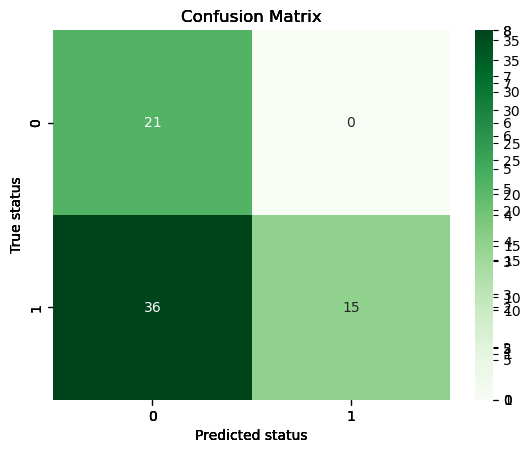

In [59]:
# Test on Test progression images
quality_scores = np.repeat([1, 1], [X_PASI.shape[0], X_dermnet.shape[0]]) # put 1x weight on samples in PASI compared to samples in Dermnet
run_random_forest(X_dermnet_PASI_train, y_dermnet_PASI_train,X_test_paper,y_test_paper,quality_scores)

quality_scores = np.repeat([5, 1], [X_PASI.shape[0], X_dermnet.shape[0]]) # put 5x weight on samples in PASI compared to samples in Dermnet
run_random_forest(X_dermnet_PASI_train, y_dermnet_PASI_train,X_test_paper,y_test_paper,quality_scores)

# Test on all progression images
quality_scores = np.repeat([1, 1], [X_PASI.shape[0], X_dermnet.shape[0]]) # put 5x weight on samples in PASI compared to samples in Dermnet
run_random_forest(X_dermnet_PASI_train, y_dermnet_PASI_train,X_paper,y_paper,quality_scores)

quality_scores = np.repeat([5, 1], [X_PASI.shape[0], X_dermnet.shape[0]]) # put 5x weight on samples in PASI compared to samples in Dermnet
run_random_forest(X_dermnet_PASI_train, y_dermnet_PASI_train,X_paper,y_paper,quality_scores)

#### Test on Test Progression Images

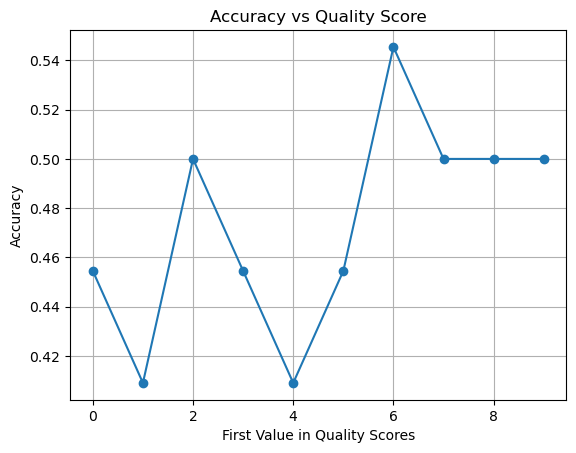

In [179]:

# Set the initial quality score value
initial_quality_score = 0

# Create an array to store accuracy scores for each quality score
accuracy_scores = []

# Create an array of quality score values to test
quality_score_values = np.arange(0, 10)

for quality_score_value in quality_score_values:
    # Repeat the updated value for the required number of times
    quality_scores = np.repeat([quality_score_value, 1], [X_PASI.shape[0], X_dermnet.shape[0]])

    # Create RandomForestClassifier
    RF = RandomForestClassifier(
        n_estimators=1000,
        criterion='entropy',
        oob_score=True,
        class_weight='balanced',
        random_state=CID
    )

    # Fit the model with the updated quality scores
    RF.fit(X_dermnet_PASI_train, y_dermnet_PASI_train, sample_weight=quality_scores)

    # Predict on the test set
    y_RF = RF.predict(X_test_paper)

    # Evaluate the model and store accuracy score
    accuracy = accuracy_score(y_test_paper, y_RF)
    accuracy_scores.append(accuracy)

# Plotting accuracy vs the first value in quality_scores
plt.plot(quality_score_values, accuracy_scores, marker='o')
plt.xlabel('First Value in Quality Scores')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Quality Score')
plt.grid(True)
plt.show()

#### Test on All Progression Images

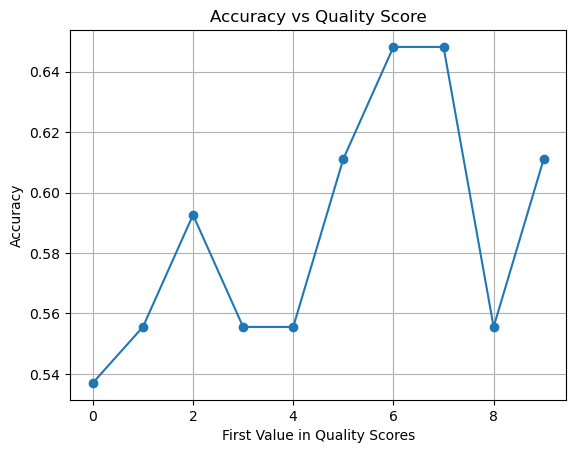

In [204]:
# Set the initial quality score value
initial_quality_score = 0

# Create an array to store accuracy scores for each quality score
accuracy_scores = []

# Create an array of quality score values to test
quality_score_values = np.arange(0, 10)

for quality_score_value in quality_score_values:
    # Repeat the updated value for the required number of times
    quality_scores = np.repeat([quality_score_value, 1], [X_PASI.shape[0], X_dermnet.shape[0]])

    # Create RandomForestClassifier
    RF = RandomForestClassifier(
        n_estimators=1000,
        criterion='entropy',
        oob_score=True,
        class_weight='balanced',
        random_state=CID
    )

    # Fit the model with the updated quality scores
    RF.fit(X_dermnet_PASI_train, y_dermnet_PASI_train, sample_weight=quality_scores)

    # Predict on the test set
    y_RF = RF.predict(X_paper)

    # Evaluate the model and store accuracy score
    accuracy = accuracy_score(y_paper, y_RF)
    accuracy_scores.append(accuracy)

# Plotting accuracy vs the first value in quality_scores
plt.plot(quality_score_values, accuracy_scores, marker='o')
plt.xlabel('First Value in Quality Scores')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Quality Score')
plt.grid(True)
plt.show()

# train on dermnet + publication with PASI + progression images train, test on progrssion images test

In [60]:
X_dermnet, y_dermnet = joblib.load('dermnet_X_y.pkl')
X_PASI, y_PASI = joblib.load('PASI_X_y.pkl')
X_train_paper, X_test_paper, y_train_paper,y_test_paper,X_paper,y_paper = joblib.load('Paper_X_y_train_test.pkl')

CID = 5

print(X_dermnet.shape)
print(y_dermnet.shape)
print(X_PASI.shape)
print(y_PASI.shape)
print(X_paper.shape)
print(y_paper.shape)

(421, 12800)
(421,)
(13, 12800)
(13,)
(72, 12800)
(72,)


In [61]:
X_dermnet_PASI_paper_train = np.vstack((X_train_paper, X_PASI, X_dermnet)) 
print(X_dermnet_PASI_paper_train.shape)
y_dermnet_PASI_paper_train = pd.concat([y_train_paper, y_PASI, y_dermnet], axis=0)
print(y_dermnet_PASI_paper_train.shape)

(488, 12800)
(488,)


              precision    recall  f1-score   support

    Improved       0.75      0.50      0.60         6
    Worsened       0.79      0.92      0.85        12

    accuracy                           0.78        18
   macro avg       0.77      0.71      0.72        18
weighted avg       0.77      0.78      0.76        18

accuracy: 0.7777777777777778


None

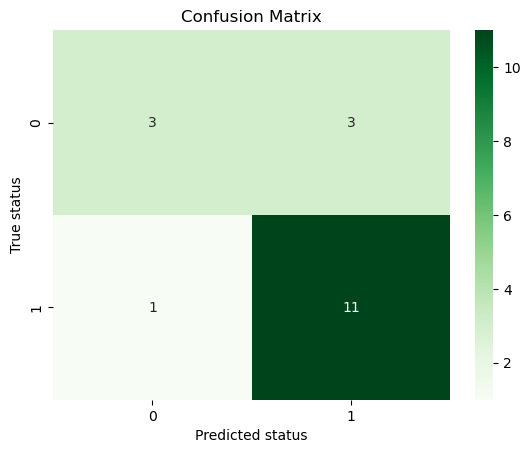

In [62]:
quality_scores = np.repeat([5, 5, 1], [X_train_paper.shape[0], X_PASI.shape[0], X_dermnet.shape[0]]) # put 5x weight on samples in PASI compared to samples in Dermnet
run_random_forest(X_dermnet_PASI_paper_train, y_dermnet_PASI_paper_train,X_test_paper,y_test_paper,quality_scores)

              precision    recall  f1-score   support

    Improved       0.80      0.67      0.73         6
    Worsened       0.85      0.92      0.88        12

    accuracy                           0.83        18
   macro avg       0.82      0.79      0.80        18
weighted avg       0.83      0.83      0.83        18

accuracy: 0.8333333333333334


None

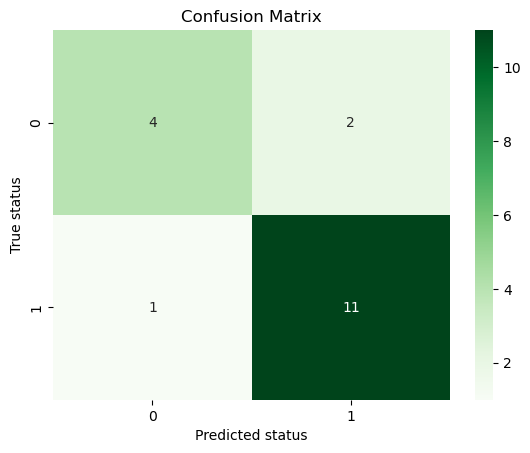

In [63]:
quality_scores = np.repeat([10, 5, 1], [X_train_paper.shape[0], X_PASI.shape[0], X_dermnet.shape[0]]) # put 5x weight on samples in PASI compared to samples in Dermnet
run_random_forest(X_dermnet_PASI_paper_train, y_dermnet_PASI_paper_train,X_test_paper,y_test_paper,quality_scores)

In [64]:
# Set the initial quality score value
initial_quality_score = 0

# Create an array to store accuracy scores for each quality score
accuracy_scores = []
quality_score_value_A_list = []
quality_score_value_B_list = []

# Create an array of quality score values to test
quality_score_values_paper = np.arange(5, 10)
quality_score_value_PASI = np.arange(1,6)

for quality_score_value_A in quality_score_values_paper:
    for quality_score_value_B in quality_score_value_PASI:
        # Repeat the updated value for the required number of times
        quality_scores = np.repeat([quality_score_value_A, quality_score_value_B, 1], [X_train_paper.shape[0], X_PASI.shape[0], X_dermnet.shape[0]])

        # Create RandomForestClassifier
        RF = RandomForestClassifier(
            n_estimators=1000,
            criterion='entropy',
            oob_score=True,
            class_weight='balanced',
            random_state=CID
        )

        # Fit the model with the updated quality scores
        RF.fit(X_dermnet_PASI_paper_train, y_dermnet_PASI_paper_train, sample_weight=quality_scores)

        # Predict on the test set
        y_RF = RF.predict(X_test_paper)

        # Evaluate the model and store accuracy score
        accuracy = accuracy_score(y_test_paper, y_RF)
        accuracy_scores.append(accuracy)
        quality_score_value_A_list.append(quality_score_value_A)
        quality_score_value_B_list.append(quality_score_value_B)


# Plotting accuracy vs the first value in quality_scores
#plt.plot(quality_score_values, accuracy_scores, marker='o')
#plt.xlabel('First Value in Quality Scores')
#plt.ylabel('Accuracy')
#plt.title('Accuracy vs Quality Score')
#plt.grid(True)
#plt.show()

In [65]:
quality_score_VS_accuracy = pd.DataFrame({
    'quality_score_values_paper': quality_score_value_A_list,
    'quality_score_values_PASI': quality_score_value_B_list,
    'accuracy_score': accuracy_scores})
quality_score_VS_accuracy


,quality_score_values_paper,quality_score_values_PASI,accuracy_score
0,5,1,0.777778
1,5,2,0.833333
2,5,3,0.833333
3,5,4,0.833333
4,5,5,0.777778
5,6,1,0.888889
6,6,2,0.777778
7,6,3,0.777778
8,6,4,0.888889
9,6,5,0.722222
